Vídeo guardado en C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_1/simulacion1.mp4


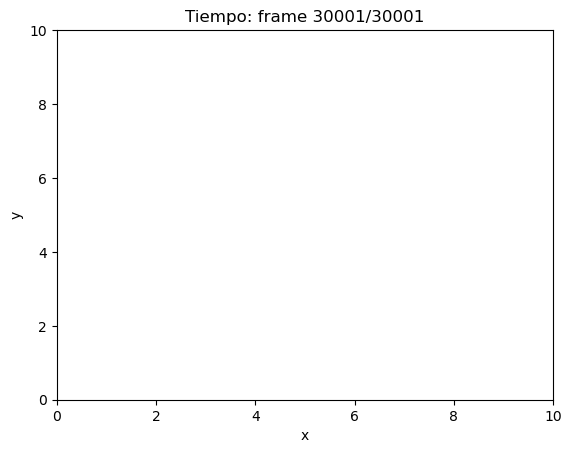

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation



data = np.loadtxt('C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_1/datos_simulacion.txt')
N, L, h, T, Time = int(data[0]), data[1], data[2], data[3], data[4]

# Parámetros a adaptar
filename    = "C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_1/posiciones.txt"   # nombre de tu fichero              
interval_ms = 10                # tiempo entre frames en ms
output_mp4  = "C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_1/simulacion1.mp4"   # nombre del fichero de salida

# --- 1) Leer y estructurar datos ---
# Cada bloque de N líneas, dos columnas x,y
data = np.loadtxt(filename)
n_frames = data.shape[0] // N

# reshaped: (n_frames, N, 2)
frames = data.reshape((n_frames, N, 2))

# --- 2) Preparar figura ---
fig, ax = plt.subplots()
scat = ax.scatter([], [], s=50)

# Ajusta límites en función de tus datos
ax.set_xlim( 0, L)
ax.set_ylim(0, L)
ax.set_xlabel('x'); ax.set_ylabel('y')

# Función de inicialización
def init():
    scat.set_offsets(np.empty((0,2)))
    return scat,


# Función que actualiza cada frame
def update(frame_idx):
    xy = frames[frame_idx]
    scat.set_offsets(xy)
    ax.set_title(f'Tiempo: frame {frame_idx+1}/{n_frames}')
    return scat,




# --- 3) Construir animación ---
anim = animation.FuncAnimation(fig, update,
                               frames=range(n_frames),
                               init_func=init,
                               interval=interval_ms,
                               blit=False)



# Guardar como vídeo mp4 (requiere ffmpeg instalado)
anim.save(output_mp4, writer='ffmpeg', dpi=150)
print(f'Vídeo guardado en {output_mp4}')